In [1]:
#Hello everyone!  Welcome to the biomedical imaging team 1 homework introduction to python and programming neural networks!
#I'll walk you through an example using the mnist dataset.
#First, we need to install mnist as it is not included in Google Colab by default.
#The "!" at the start of this line instructs Colab to execute a shell command.
%pip install mnist
#Now, mnist should be downloaded and installed as a python package.  
#Python has a variety of packages that add reusable functionality of many kinds.

#Now we need to import the "mnist" package.
from keras.datasets import mnist



(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#These are calls to the python "print" function which display text to the screen.
#Also make note of the python "." operator which is used to reference items inside objects, such as packages.
#The function "mnist.train_images" returns a Numpy array with the data.
#Numpy arrays can have multiple dimensions.  Their size on each axis is described by the "shape" attribute.
#Let's look at the shapes of the images and labels.
# print(mnist.train_images().shape)
# print(mnist.test_images().shape)
# print(mnist.train_labels().shape)
# print(mnist.test_labels().shape)
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)


Note: you may need to restart the kernel to use updated packages.
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Based on the returned information, how many images are present?  What is the size of each image?  How are these images labeled?

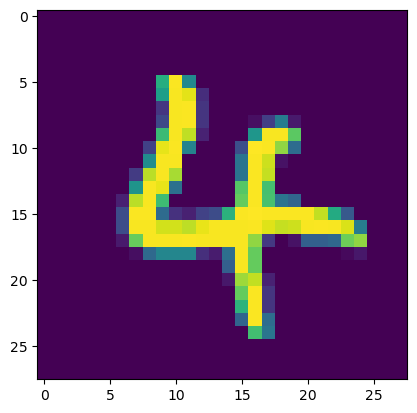

In [2]:
#Like we discussed in the last meeting, data is the more involved and difficult part of data science.
#Let's make sure we examine our data before we start training.

#This line isn't python.  It's a special instruction to the Jupyter notebook to allow us to use matplotlib to make figures in the notebook.
%matplotlib inline

#We also need to import some more python packages.  Notice the use of "from" here.
from matplotlib import pyplot
import numpy

#We want to select an image to plot at random.  To do this, we need to generate a random number using Numpy.
#Here, we use python's "range" function to make a list of numbers from 0 to NUMBER_OF_IMAGES.
#PLEASE replace NUMBER_OF_IMAGES with the actual number of images in the training portion of the dataset.
#"range" returns an "iterator" object.  We need this to be a "list" object, so we make it one.
indexes = list(range(60000))
i = numpy.random.choice(indexes)

#Now we will "imshow" the i'th image of the train_images.
pyplot.imshow(train_images[i])

In [3]:
#Did you see how the images were labeled?  This is important!
#Let's have a look at the first 10 labels.
#We can do this using python slices, "array[start:stop]".
# train_labels = mnist.train_labels()
print(train_labels[0:10])
#Notice two things.  First, slicing produced a small, "slice" of the array.
#Second.  The images are labeled by the number represented.
#This is actually not good for neural networks.
#We want to classify each image according to the written number, but the current labels imply a numerical relationship.
#We don't usually want o imply a > or < relationship during a classification problem.
#To fix this and help our neural network perform better, we will change this to one-hot-encoding.

[5 0 4 1 9 2 1 3 1 4]


In [4]:
#One-hot-encoding will represent 5 as 0000010000.
# 3 = 0001000000
# 9 = 0000000001

#Let's make a python function for one-hot-encoding the digits.

def one_hot(label):
  new_label = numpy.zeros(10)
  new_label[label] = 1
  return new_label

#Python cares about whitespace!
#Python separates the inside of functions, loops, if statements, etc by their indentation level.
#If your indentation is off, python will complain!
#This unique syntax helps python be more readable.

#Try using this function with a few digits to make sure the function works like we want it to.

In [5]:
# We need another function to give one-hot-encodings to all the labels in a list of labels.
def one_hot_array(labels):
  #Let's make an empty list to store our results.
  new_labels = []
  
  #We'll use a "for" loop to look at each label in the list.
  for label in labels:
    new_labels.append(one_hot(label))

  #Before we're done, we need to turn the list into a numpy array.  We almost always use numpy arrays with neural networks.
  return numpy.asarray(new_labels)

Each of the trainable parameters in this model represents a weight or bias for one of it's artificial neurons.  When we train the neural network, we adjust the weights until the neural network learns to give correct answers.

How many trainable parameters are in this model?
How many non-trainable?

There are some problems with this model.  Neural networks with this structure are called multi-layer perceptrons (MLPs).  MLPs are very sensitive to exactly where things are in the image.  For instance, moving a cat slightly to the left might confuse the network into thinking it is no longer a cat.  Also, these networks have a very large number of trainable parameters.

We can solve these problems with a convolutional neural network (CNN).  CNNs look for patterns whereever they appear in the image.  In this way, they are no longer sensitive to position.  They also "reuse" pattern-finding neurons by using them in small patches that slide across the entire image.  CNNs are the innovation that allowed computer vision to take off the way it has.

Look at this YouTube video to see how a CNN reuses neurons.  https://www.youtube.com/watch?v=KTB_OFoAQcc

In [6]:
#Now, let's finally build a computer vision neural network!
#We'll use the "keras" package for this.
#We need a few things "from" keras.
from keras import Model
from keras.layers import Dense, Input, Flatten
#A convolutional neural network is just a network that has one or more Convolutional layers in it.
from keras.layers import Conv2D
#It also typically includes pooling layers that reduce the size of an image.
from keras.layers import MaxPooling2D

#Let's make a network like the one we saw above.
#Note that our input shape has changed slightly.
image = Input(shape=(28, 28, 1))

#yow, let's make our first convolution layer followed by our first pooling layer.
#This network will 16 neurons (convolution filters).
#Each filter will be 3x3.
#We'll use a 'relu' activation and 'same' padding.
conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')
conv1 = conv1(image)

#Next, pooling.
#The default pool size is 2x2 and shrinks the image by half on each dimension.
pool1 = MaxPooling2D()
pool1 = pool1(conv1)

#Now you create the second convolution and second pooling layers.
conv2 = Conv2D(16, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D()(conv2)

#Now we have a nice feature map.
#Next we flatten the data.  This is when our data will stop being an image and start being an array.
#You can think of this as when the neural network stops "seeing" and starts "thinking about what it saw."
flat = Flatten()
flat = flat(pool2)

#Adding Dense layers will let us think about what we saw and answer the questions we care about.
dense1 = Dense(100, activation='relu')
dense1 = dense1(flat)

#Please make the final classifier layer here:
dense2 = Dense(10, activation='softmax')(dense1)

model = Model(image, dense2)

: 

: 

In [ ]:
#Go ahead and look at the model's summary and produce a plot of the model.
model.summary()
#How does the number of parameters compare between the CNN and the MLP?

In [ ]:
#CNNs compile the same as other neural networks.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Now let's train the model.
#Remember, our input shape is a bit different.
#CNNs requrie the shape to be (28, 28, 1) instead of (28, 28).
#We use numpy.expand_dims to add the extra "1".
model.fit(numpy.expand_dims(train_images, axis=-1), one_hot_array(train_labels))

In [ ]:
#Let's see how the model performed.
model.evaluate(numpy.expand_dims(mnist.test_images(), axis=-1), one_hot_array(mnist.test_labels()))
#How did the CNN's performance compare to the MLP's?

In [ ]:
# Temporary placeholder for batching
import math
import numpy as np
from matplotlib import pyplot
from skimage.io import imread
from skimage.transform import resize
from keras.datasets import mnist
from keras import Model
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Conv3D
from keras.layers import MaxPooling3D
import tensorflow as tf
import GBMnet_batch # Batching class. 
from GBMnet_helpers import * # Helper functions

class GBMnet_batch(tf.keras.utils.Sequence):
    def __init__(self, x_set, y_set, ImgX, ImgY, batch_size):
        self.x, self.y = x_set, y_set
        self.ImgX, self.ImgY = ImgX, ImgY
        self.batch_size = batch_size

    def __len__(self):
        return math.ceil(len(self.x) / self.batch_size)

    def __getitem__(self, idx):
        low = idx * self.batch_size
        # Cap upper bound at array length; the last batch may be smaller
        # if the total number of items is not a multiple of batch size.
        high = min(low + self.batch_size, len(self.x))
        batch_x = self.x[low:high]
        batch_y = self.y[low:high]

        return np.array([
            resize(imread(file_name), (254, 200))
               for file_name in batch_x]), np.array(batch_y)

def one_hot(label):
  new_label = np.zeros(10)
  new_label[label] = 1
  return new_label

def one_hot_array(labels):
  #Let's make an empty list to store our results.
  new_labels = []
  
  #We'll use a "for" loop to look at each label in the list.
  for label in labels:
    new_labels.append(one_hot(label))

  #Before we're done, we need to turn the list into a numpy array.  We almost always use numpy arrays with neural networks.
  return np.asarray(new_labels)


# Import
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Summary Information
print(train_images.shape)
print(test_images.shape)

print(train_labels.shape)
print(test_labels.shape)

### CNN Parameters
xImage = 254
yImage = 254
batchSize = 10000

### Batching
batchedData = GBMnet_batch()
